<a href="https://colab.research.google.com/github/Abdelrhman2022/Password-Strength-Classifier-Model-Using-NLP-TF-IDF/blob/main/NLP_Password_Strength_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### REading dataset

In [3]:
data=pd.read_csv('/content/drive/MyDrive/NLP_Password_Strength_classifier/data.csv',error_bad_lines=False)
data.head()

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [4]:
data['strength'].unique()


array([1, 2, 0])

#### code to check all the missing values in my dataset

In [5]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [6]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

password    0
strength    0
dtype: int64

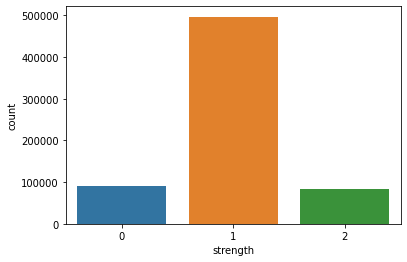

In [9]:
sns.countplot(data['strength']);

In [10]:
password_tuple=np.array(data)

In [11]:
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

#### shuffling randomly for robustness

In [12]:
import random
random.shuffle(password_tuple)

In [13]:
x=[labels[0] for labels in password_tuple]
y=[labels[1] for labels in password_tuple]


In [14]:
x

['kzde5577',
 'kzde5577',
 'visi7k1yr',
 'kzde5577',
 'lamborghin1',
 'AVYq1lDE4MgAZfNt',
 'kzde5577',
 'megzy123',
 'kzde5577',
 'lamborghin1',
 'kzde5577',
 'asv5o9yu',
 'kino3434',
 'lamborghin1',
 'megzy123',
 'asv5o9yu',
 'WUt9IZzE0OQ7PkNE',
 'jerusalem393',
 'WUt9IZzE0OQ7PkNE',
 'v1118714',
 'g067057895',
 'idofo673',
 'v1118714',
 'jerusalem393',
 'g067057895',
 '612035180tok',
 'megzy123',
 'faranumar91',
 'visi7k1yr',
 'v1118714',
 'czuodhj972',
 'trabajonet9',
 '52558000aaa',
 'jytifok873',
 'g067057895',
 'u6c8vhow',
 'trabajonet9',
 'asgaliu11',
 '612035180tok',
 'g067057895',
 'u6c8vhow',
 'kswa2mrv',
 '6975038lp',
 'trabajonet9',
 'czuodhj972',
 'yqugu927',
 'elyass15@ajilent-ci',
 'exitos2009',
 'kino3434',
 'visi7k1yr',
 '612035180tok',
 'gaymaids1',
 'lsdlsd1',
 'trabajonet9',
 'go7kew7a2po',
 'gaymaids1',
 'prisonbreak1',
 'v1118714',
 '52558000aaa',
 'gaymaids1',
 'megzy123',
 'megzy123',
 'olmaz.',
 'kswa2mrv',
 'g067057895',
 'fk9qi21m',
 'fk9qi21m',
 'd04m11',
 'v

#### create a custom function to split input into characters of list

In [15]:
def word_divide_char(inputs):
    character=[]
    for i in inputs:
        character.append(i)
    return character

In [16]:
word_divide_char('kzde5577')

['k', 'z', 'd', 'e', '5', '5', '7', '7']

#### import TF-IDF vectorizer to convert String data into numerical data

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
vectorizer=TfidfVectorizer(tokenizer = word_divide_char)

#### apply TF-IDF vectorizer on data

In [19]:
X=vectorizer.fit_transform(x)

In [20]:
X.shape

(669639, 121)

In [21]:
vectorizer.get_feature_names()

['\x05',
 '\x06',
 '\x10',
 '\x11',
 '\x12',
 '\x16',
 '\x17',
 '\x19',
 '\x1b',
 '\x1c',
 '\x1e',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x81',
 '\xa0',
 '¡',
 '¨',
 '«',
 '°',
 '±',
 '²',
 '³',
 'µ',
 '·',
 'º',
 '¾',
 '¿',
 '×',
 'ß',
 'à',
 'á',
 'â',
 'ä',
 'å',
 'æ',
 'è',
 'é',
 'í',
 'ï',
 'ð',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 '÷',
 'ù',
 'ú',
 'û',
 'ü',
 'ý',
 'þ',
 'ÿ',
 '—',
 '‚',
 '™']

In [22]:
first_document_vector=X[0]
first_document_vector

<1x121 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [23]:
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56705951],
        [0.        ],
        [0.59162893],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [24]:
df=pd.DataFrame(first_document_vector.T.todense(),index=vectorizer.get_feature_names(),columns=['TF-IDF'])
df.sort_values(by=['TF-IDF'],ascending=False)

,TF-IDF
7,0.591629
5,0.567060
z,0.335870
k,0.291621
d,0.285577
...,...
<,0.000000
;,0.000000
9,0.000000
8,0.000000


###Split Dataset

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Apply Traditional Machine Learning Classification Algorithms 

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split

In [28]:
cv=ShuffleSplit(n_splits=10,test_size=0.3,random_state=42)

In [29]:
AdaBoost = cross_val_score(AdaBoostClassifier(),X_train,y_train,cv=cv,scoring='accuracy', verbose = 2, n_jobs=10)
print("Mean Accuracy : ", AdaBoost.mean())
print("Standard Deviation Accuracy : ", AdaBoost.std())

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:  3.8min remaining:  8.9min


Mean Accuracy :  0.8358070858792639
Standard Deviation Accuracy :  0.0023068487458787978


[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:  7.1min finished


In [30]:
XGB = cross_val_score(XGBClassifier(),X_train,y_train,cv=cv,scoring='accuracy', verbose = 2, n_jobs=10)
print("Mean Accuracy : ", XGB.mean())
print("Standard Deviation Accuracy : ", XGB.std())

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed: 22.6min remaining: 52.7min


Mean Accuracy :  0.915687494555546
Standard Deviation Accuracy :  0.0006838446690389926


[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed: 27.7min finished


In [31]:
clf = cross_val_score(LogisticRegression(),X_train,y_train,cv=cv,scoring='accuracy', verbose = 2, n_jobs=10)
print("Mean Accuracy : ", clf.mean())
print("Standard Deviation Accuracy : ", clf.std())

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:  1.4min remaining:  3.2min


Mean Accuracy :  0.8189510559129882
Standard Deviation Accuracy :  0.0006887731199274577


[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:  2.7min finished


In [ ]:
SVC = cross_val_score(SVC(),X_train,y_train,cv=cv,scoring='accuracy', verbose = 2, n_jobs=10)
print("Mean Accuracy : ", SVC.mean())
print("Standard Deviation Accuracy : ", SVC.std())

#### It's clear the best algorithm in this case is **XGBoost**

In [32]:
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [33]:
# Initialize domain space for range of values
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [34]:
# Define objective function

from sklearn.metrics import confusion_matrix,accuracy_score
def objective(space):
    clf=XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="mlogloss",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK  }

In [35]:

trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 20,
                        trials = trials)

SCORE:
0.7619616510363778
SCORE:
0.7633205901678514
SCORE:
0.7620587181171973
SCORE:
0.761991517830476
SCORE:
0.7520832088883579
SCORE:
0.7646944626963742
SCORE:
0.7662400692909623
SCORE:
0.7626485873006391
SCORE:
0.7628800549549012
SCORE:
0.7637312585867033
SCORE:
0.7636640582999821
SCORE:
0.7657024669971926
SCORE:
0.7660384684307986
SCORE:
0.7633579236604743
SCORE:
0.7621109850068694
SCORE:
0.7617899169703124
SCORE:
0.7659414013499791
SCORE:
0.763006988829819
SCORE:
0.7626784540947374
SCORE:
0.763985126336539
100%|██████████| 20/20 [30:59<00:00, 92.98s/it, best loss: -0.7662400692909623]


In [44]:
best_hyperparams

{'colsample_bytree': 0.9415771855740308,
 'gamma': 4.83111946316023,
 'max_depth': 13.0,
 'min_child_weight': 6.0,
 'reg_alpha': 46.0,
 'reg_lambda': 0.11353995179446696}

In [43]:
clf=XGBClassifier( colsample_bytree =  0.9415771855740308,
  gamma = 4.83111946316023,
 max_depth= 13,
 min_child_weight = 6,
 reg_alpha = 46,
 reg_lambda = 0.11353995179446696
                    
                    ).fit(X_train, y_train)

#### doing prediction for specific custom data

In [45]:
dt=np.array(['%@123abcd'])
pred=vectorizer.transform(dt)
clf.predict(pred)[0]

2

#### doing prediction on X-Test data

In [46]:
y_pred=clf.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 2, 1])

#### check Accuracy of your model using confusion_matrix,accuracy_score

In [47]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[15897  1999     1]
 [  598 98337   474]
 [    8   724 15890]]


In [48]:
print(accuracy_score(y_test,y_pred))

0.9715966788124962


##### create report of your model

In [49]:
from sklearn.metrics import classification_report,  plot_confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92     17897
           1       0.97      0.99      0.98     99409
           2       0.97      0.96      0.96     16622

    accuracy                           0.97    133928
   macro avg       0.97      0.94      0.96    133928
weighted avg       0.97      0.97      0.97    133928



### Saving Model

In [50]:
import pickle

In [57]:
import pickle
with open ('password.pkl','wb') as f:
    pickle.dump(clf,f)

In [58]:
with open ('vect','wb') as f:
    pickle.dump(vectorizer,f)

In [59]:

with open ('password.pkl','rb') as f:
    model=pickle.load(f)

In [60]:
with open ('vect','rb') as f:
    tf=pickle.load(f)

In [61]:
def predict(a):
    x=tf.transform([a])
    pre=model.predict(x)
    return pre

In [62]:
x=predict('donkey@4419')
x[0]

1